In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
import statistics as st

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [224]:
from google.colab import drive

In [225]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
path1="/content/drive/MyDrive/processed_df.csv"

In [227]:
df=pd.read_csv(path1)

In [228]:
df.head()

,Unnamed: 0,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,...,preferred_location_type_Medical,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,following_company_page_Yes,working_flag_Yes,Adult_flag_1,Adult_flag_2,Adult_flag_3
0,0,307.0,38570.0,1.0,94.0,5993.0,8.0,11.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,367.0,9765.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2,277.0,48055.0,1.0,92.0,2090.0,6.0,15.0,2.0,7.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,247.0,48720.0,1.0,56.0,2909.0,1.0,11.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,202.0,20685.0,1.0,40.0,3468.0,9.0,12.0,4.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11759 entries, 0 to 11758
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    11759 non-null  int64  
 1   Yearly_avg_view_on_travel_page                11759 non-null  float64
 2   total_likes_on_outstation_checkin_given       11759 non-null  float64
 3   yearly_avg_Outstation_checkins                11759 non-null  float64
 4   Yearly_avg_comment_on_travel_page             11759 non-null  float64
 5   total_likes_on_outofstation_checkin_received  11759 non-null  float64
 6   week_since_last_outstation_checkin            11759 non-null  float64
 7   montly_avg_comment_on_company_page            11759 non-null  float64
 8   travelling_network_rating                     11759 non-null  float64
 9   Daily_Avg_mins_spend_on_traveling_page        11759 non-null 

In [230]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [231]:
df.shape

(11759, 32)

In [232]:
df.size

376288

In [233]:
df_mob = df[df['preferred_device_Mobile']==1]

In [234]:
df_mob.shape

(10651, 32)

In [235]:
df_laptop = df[df['preferred_device_Mobile']==0]

In [236]:
df_laptop.shape

(1108, 32)

**WE WOULD TRY TO BUILD VARIOUS MODELS FOR MOBILE AS WELL AS LAPTOP USERS SEPARATELY**

**MOBILE USERS**

In [237]:
df_mob.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,10651.0,281.135480,68.047854,94.0,232.0,271.0,324.000000,462.00
total_likes_on_outstation_checkin_given,10651.0,28147.854125,14023.882071,3570.0,16446.0,28210.0,40279.214286,75643.75
yearly_avg_Outstation_checkins,10651.0,8.110372,8.675151,1.0,1.0,3.0,14.000000,29.00
Yearly_avg_comment_on_travel_page,10651.0,74.329540,21.690115,4.5,57.0,74.0,92.000000,144.50
total_likes_on_outofstation_checkin_received,10651.0,6414.857854,4368.707541,1009.0,2946.0,4968.0,8394.500000,16572.25
week_since_last_outstation_checkin,10651.0,3.225049,2.628117,0.0,1.0,3.0,5.000000,11.00
montly_avg_comment_on_company_page,10651.0,22.486621,7.370853,11.0,17.0,22.0,27.000000,42.00
travelling_network_rating,10651.0,2.705474,1.080909,1.0,2.0,3.0,4.000000,4.00
Daily_Avg_mins_spend_on_traveling_page,10651.0,13.644353,7.986331,0.0,8.0,12.0,18.000000,33.00
Taken_product_Yes,10651.0,0.152098,0.359133,0.0,0.0,0.0,0.000000,1.00


In [238]:
df_mob.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Taken_product_Yes,...,preferred_location_type_Medical,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,following_company_page_Yes,working_flag_Yes,Adult_flag_1,Adult_flag_2,Adult_flag_3
0,307.0,38570.0,1.0,94.0,5993.0,8.0,11.0,1.0,8.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,367.0,9765.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,277.0,48055.0,1.0,92.0,2090.0,6.0,15.0,2.0,7.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,247.0,48720.0,1.0,56.0,2909.0,1.0,11.0,3.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,202.0,20685.0,1.0,40.0,3468.0,9.0,12.0,4.0,6.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [239]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [240]:
x = df_mob.drop('Taken_product_Yes',axis=1)
y=df_mob['Taken_product_Yes']


In [241]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)


In [242]:
x_train.shape

(7455, 31)

In [243]:
x_test.shape

(3196, 31)

In [244]:
y_train.value_counts(normalize=True)

0.0    0.847485
1.0    0.152515
Name: Taken_product_Yes, dtype: float64

In [245]:
y_test.value_counts(normalize=True)

0.0    0.848874
1.0    0.151126
Name: Taken_product_Yes, dtype: float64

In [246]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## MODELS

**Naive Bayes Model**

In [247]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [248]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [249]:
y_train_predict = NB_model.predict(x_train)
model_score = NB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7951710261569417
[[5544  774]
 [ 753  384]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      6318
         1.0       0.33      0.34      0.33      1137

    accuracy                           0.80      7455
   macro avg       0.61      0.61      0.61      7455
weighted avg       0.80      0.80      0.80      7455



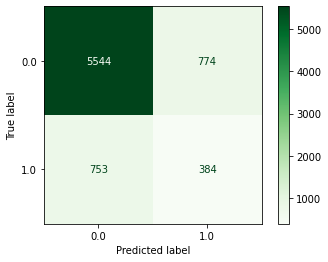

In [250]:
plot_confusion_matrix(NB_model,x_train,y_train,cmap=plt.cm.Greens);

In [251]:
y_test_predict = NB_model.predict(x_test)
model_score = NB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7944305381727159
[[2378  335]
 [ 322  161]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2713
         1.0       0.32      0.33      0.33       483

    accuracy                           0.79      3196
   macro avg       0.60      0.60      0.60      3196
weighted avg       0.80      0.79      0.80      3196



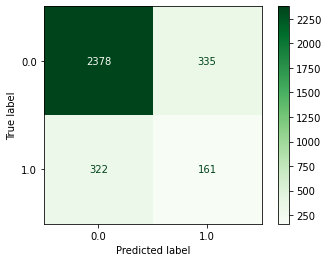

In [252]:
plot_confusion_matrix(NB_model,x_test,y_test,cmap=plt.cm.Greens);


AUC: 0.727


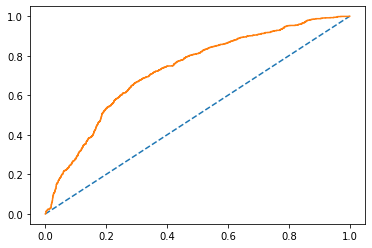

In [253]:
# predict probabilities
probs = NB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.727


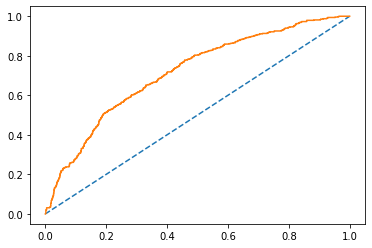

In [254]:
probs = NB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


### **LDA**

In [255]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(x_train, y_train)


LinearDiscriminantAnalysis()

In [256]:
y_train_predict = LDA_model.predict(x_train)
model_score = LDA_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8706908115358819
[[6180  138]
 [ 826  311]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      6318
         1.0       0.69      0.27      0.39      1137

    accuracy                           0.87      7455
   macro avg       0.79      0.63      0.66      7455
weighted avg       0.85      0.87      0.85      7455



In [257]:
y_test_predict = LDA_model.predict(x_test)
model_score = LDA_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.869837296620776
[[2646   67]
 [ 349  134]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2713
         1.0       0.67      0.28      0.39       483

    accuracy                           0.87      3196
   macro avg       0.78      0.63      0.66      3196
weighted avg       0.85      0.87      0.85      3196



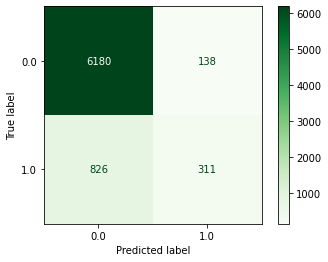

In [258]:
plot_confusion_matrix(LDA_model,x_train,y_train,cmap=plt.cm.Greens);

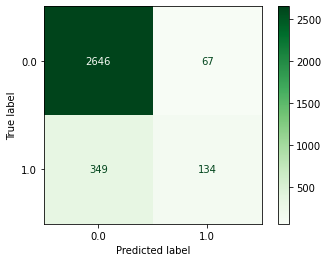

In [259]:
plot_confusion_matrix(LDA_model,x_test,y_test,cmap=plt.cm.Greens);


AUC: 0.799


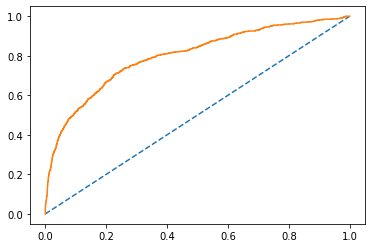

In [260]:
# predict probabilities
probs = LDA_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.799


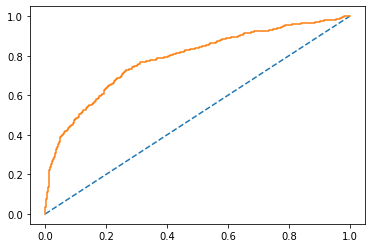

In [261]:
probs = LDA_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**LOGISTIC REGRESSION**

In [262]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [263]:
LR_model = LogisticRegression(max_iter=10000,verbose=True)
LR_model.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, verbose=True)

In [264]:
ytrain_predict = LR_model.predict(x_train)
ytest_predict = LR_model.predict(x_test)

In [265]:
y_train_predict = LR_model.predict(x_train)
model_score = LR_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8716297786720322
[[6211  107]
 [ 850  287]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      6318
         1.0       0.73      0.25      0.37      1137

    accuracy                           0.87      7455
   macro avg       0.80      0.62      0.65      7455
weighted avg       0.86      0.87      0.84      7455



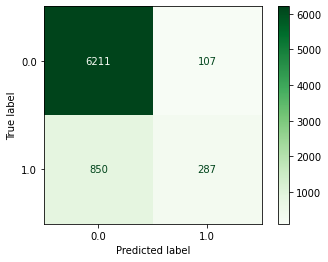

In [266]:
plot_confusion_matrix(LR_model,x_train,y_train,cmap=plt.cm.Greens);


AUC: 0.803


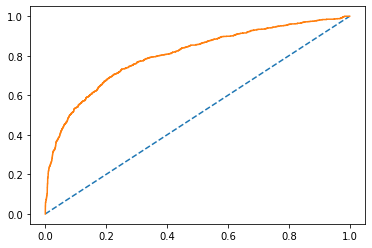

In [267]:
# predict probabilities
probs = LR_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


In [268]:
y_test_predict = LR_model.predict(x_test)
model_score = LR_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8720275344180225
[[2658   55]
 [ 354  129]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2713
         1.0       0.70      0.27      0.39       483

    accuracy                           0.87      3196
   macro avg       0.79      0.62      0.66      3196
weighted avg       0.86      0.87      0.85      3196



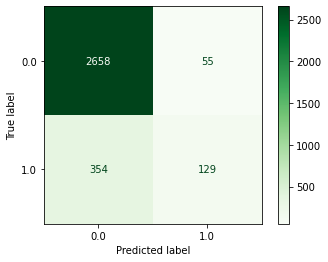

In [269]:
plot_confusion_matrix(LR_model,x_test,y_test,cmap=plt.cm.Greens);


AUC: 0.803


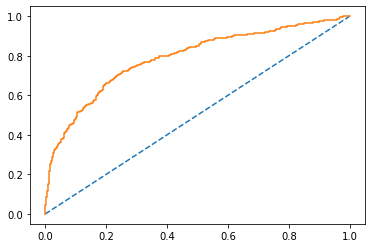

In [270]:
probs = LR_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


GRID SEARCH CV

In [271]:
grid={'penalty':['l1','l2','none','elasticnet'],
  'solver':['saga','sag','lbfgs','newton-cg'],
      'tol':[0.01,0.001,0.0001]}

In [272]:
LR_model = LogisticRegression(max_iter=10000,n_jobs=2)


In [273]:
grid_search = GridSearchCV(estimator = LR_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [274]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none', 'elasticnet'],
                         'solver': ['saga', 'sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='f1')

In [275]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)


{'penalty': 'none', 'solver': 'sag', 'tol': 0.001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag',
                   tol=0.001)


In [276]:
best_model = grid_search.best_estimator_


In [277]:
ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)


In [278]:
ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.615943,0.384057
1,0.680804,0.319196
2,0.926584,0.073416
3,0.411942,0.588058
4,0.860572,0.139428


0.8710932260228035
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      6318
         1.0       0.72      0.25      0.37      1137

    accuracy                           0.87      7455
   macro avg       0.80      0.62      0.65      7455
weighted avg       0.86      0.87      0.84      7455
 



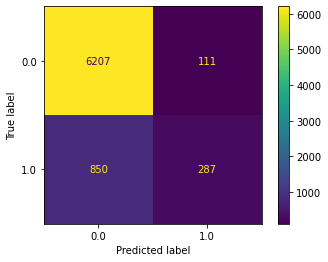

In [279]:
y_train_predict = best_model.predict(x_train)
model_score = best_model.score(x_train, y_train)
print(model_score)
plot_confusion_matrix(best_model,x_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');


0.8717146433041302
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2713
         1.0       0.70      0.27      0.39       483

    accuracy                           0.87      3196
   macro avg       0.79      0.62      0.66      3196
weighted avg       0.85      0.87      0.85      3196
 



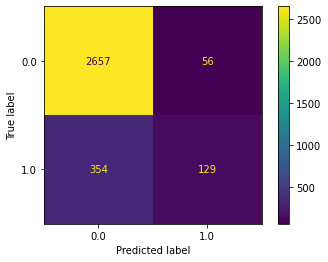

In [280]:
y_test_predict = best_model.predict(x_test)
model_score = best_model.score(x_test, y_test)
print(model_score)
plot_confusion_matrix(best_model,x_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');


AUC: 0.803


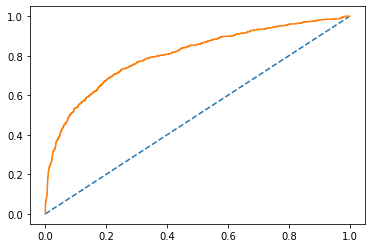

In [281]:
# predict probabilities
probs = best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.803


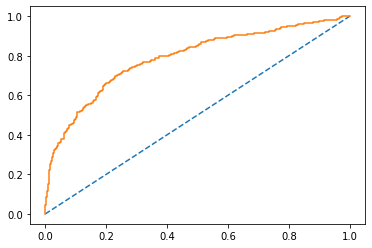

In [282]:
probs = best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**KNN**

In [283]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)


KNeighborsClassifier()

In [284]:
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9694164989939638
[[6269   49]
 [ 179  958]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      6318
         1.0       0.95      0.84      0.89      1137

    accuracy                           0.97      7455
   macro avg       0.96      0.92      0.94      7455
weighted avg       0.97      0.97      0.97      7455



In [285]:
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9258448060075094
[[2652   61]
 [ 176  307]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2713
         1.0       0.83      0.64      0.72       483

    accuracy                           0.93      3196
   macro avg       0.89      0.81      0.84      3196
weighted avg       0.92      0.93      0.92      3196



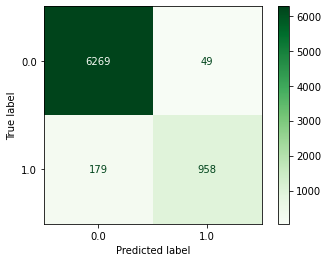

In [286]:
plot_confusion_matrix(KNN_model,x_train,y_train,cmap=plt.cm.Greens);


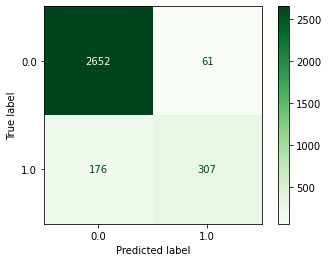

In [287]:
plot_confusion_matrix(KNN_model,x_test,y_test,cmap=plt.cm.Greens);


AUC: 0.992


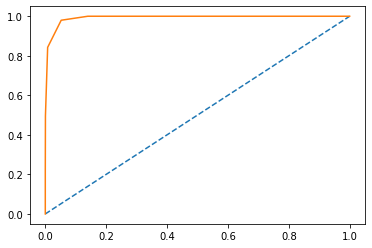

In [288]:
# predict probabilities
probs = KNN_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.992


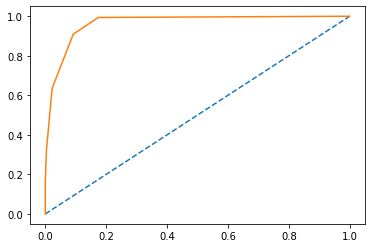

In [289]:
probs = KNN_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


# **TUNING KNN MODEL**

**Run the KNN with no of neighbours to be 1,3,5..19 and find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error. Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE**

In [290]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.01126408010012514,
 0.03504380475594493,
 0.0741551939924906,
 0.10607008760951186,
 0.10387984981226528,
 0.11045056320400504,
 0.12171464330413018,
 0.1292240300375469,
 0.1317271589486858,
 0.13548185231539422]

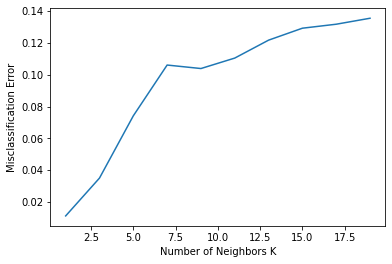

In [291]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [292]:
KNN_model=KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [293]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6318    0]
 [   0 1137]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6318
         1.0       1.00      1.00      1.00      1137

    accuracy                           1.00      7455
   macro avg       1.00      1.00      1.00      7455
weighted avg       1.00      1.00      1.00      7455



In [294]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9887359198998749
[[2695   18]
 [  18  465]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2713
         1.0       0.96      0.96      0.96       483

    accuracy                           0.99      3196
   macro avg       0.98      0.98      0.98      3196
weighted avg       0.99      0.99      0.99      3196



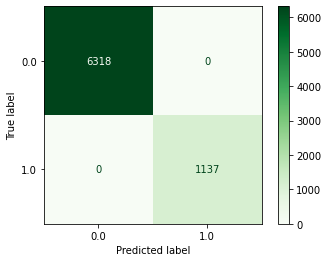

In [295]:
plot_confusion_matrix(KNN_model,x_train,y_train,cmap=plt.cm.Greens);

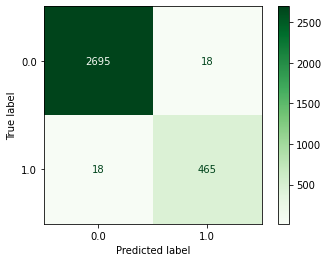

In [296]:
plot_confusion_matrix(KNN_model,x_test,y_test,cmap=plt.cm.Greens);

AUC: 1.000


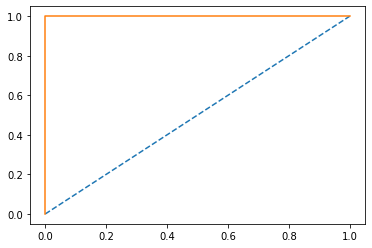

In [297]:
# predict probabilities
probs = KNN_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


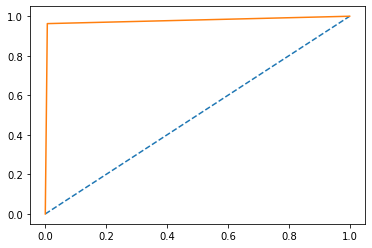

In [298]:
probs = KNN_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**DECISION TREE**

In [299]:
from sklearn import tree

DT_model= tree.DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [300]:
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


1.0
[[6318    0]
 [   0 1137]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6318
         1.0       1.00      1.00      1.00      1137

    accuracy                           1.00      7455
   macro avg       1.00      1.00      1.00      7455
weighted avg       1.00      1.00      1.00      7455



In [301]:
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


0.9718397997496871
[[2672   41]
 [  49  434]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2713
         1.0       0.91      0.90      0.91       483

    accuracy                           0.97      3196
   macro avg       0.95      0.94      0.94      3196
weighted avg       0.97      0.97      0.97      3196



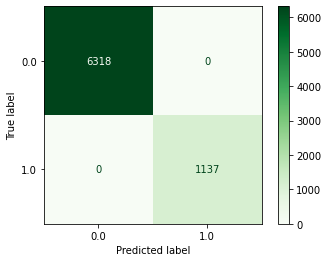

In [302]:
plot_confusion_matrix(DT_model,x_train,y_train,cmap=plt.cm.Greens);


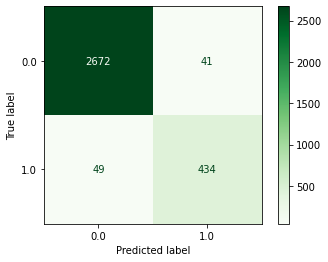

In [303]:
plot_confusion_matrix(DT_model,x_test,y_test,cmap=plt.cm.Greens);


AUC: 1.000


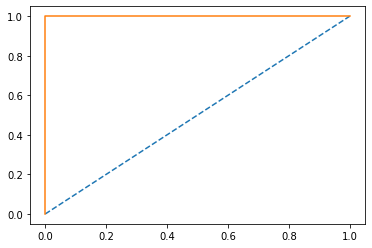

In [304]:
# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 1.000


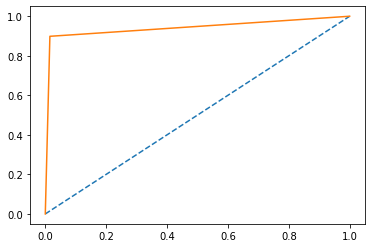

In [305]:
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**RANDOM FOREST**

In [85]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(x_train, y_train)


RandomForestClassifier(random_state=1)

In [86]:
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


1.0
[[6318    0]
 [   0 1137]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6318
         1.0       1.00      1.00      1.00      1137

    accuracy                           1.00      7455
   macro avg       1.00      1.00      1.00      7455
weighted avg       1.00      1.00      1.00      7455



In [87]:
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


0.9809136420525657
[[2710    3]
 [  58  425]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2713
         1.0       0.99      0.88      0.93       483

    accuracy                           0.98      3196
   macro avg       0.99      0.94      0.96      3196
weighted avg       0.98      0.98      0.98      3196



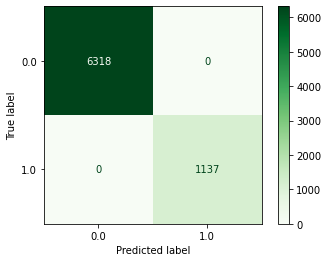

In [88]:
plot_confusion_matrix(RF_model,x_train,y_train,cmap=plt.cm.Greens);


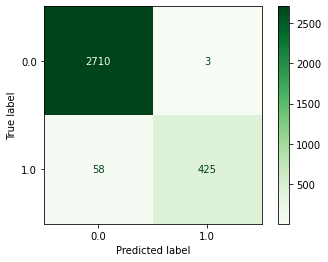

In [89]:
plot_confusion_matrix(RF_model,x_test,y_test,cmap=plt.cm.Greens);


AUC: 1.000


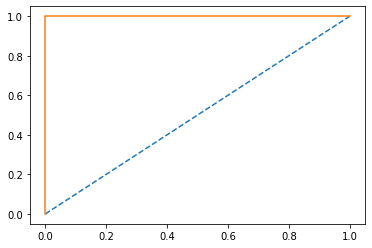

In [90]:
# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 1.000


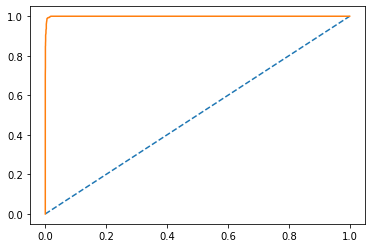

In [91]:
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**BAGGING**

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(x_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [93]:
y_train_predict = Bagging_model.predict(x_train)
model_score =Bagging_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


1.0
[[6318    0]
 [   0 1137]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6318
         1.0       1.00      1.00      1.00      1137

    accuracy                           1.00      7455
   macro avg       1.00      1.00      1.00      7455
weighted avg       1.00      1.00      1.00      7455



In [94]:
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


0.983729662077597
[[2709    4]
 [  48  435]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2713
         1.0       0.99      0.90      0.94       483

    accuracy                           0.98      3196
   macro avg       0.99      0.95      0.97      3196
weighted avg       0.98      0.98      0.98      3196



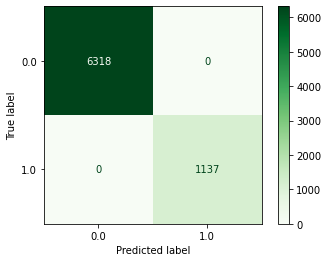

In [95]:
plot_confusion_matrix(Bagging_model,x_train,y_train,cmap=plt.cm.Greens);


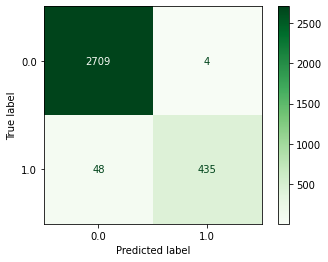

In [96]:
plot_confusion_matrix(Bagging_model,x_test,y_test,cmap=plt.cm.Greens);


AUC: 1.000


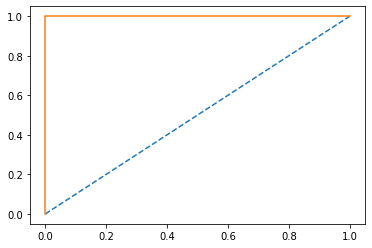

In [97]:
# predict probabilities
probs = Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 1.000


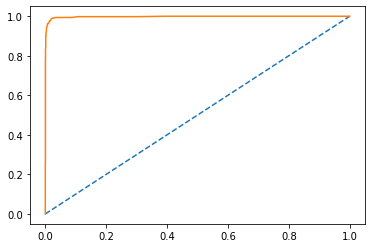

In [98]:
probs = Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**ADA BOOST**

In [99]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [100]:
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8834339369550637
[[6169  149]
 [ 720  417]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93      6318
         1.0       0.74      0.37      0.49      1137

    accuracy                           0.88      7455
   macro avg       0.82      0.67      0.71      7455
weighted avg       0.87      0.88      0.87      7455



In [101]:
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


0.8735919899874843
[[2626   87]
 [ 317  166]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2713
         1.0       0.66      0.34      0.45       483

    accuracy                           0.87      3196
   macro avg       0.77      0.66      0.69      3196
weighted avg       0.86      0.87      0.86      3196



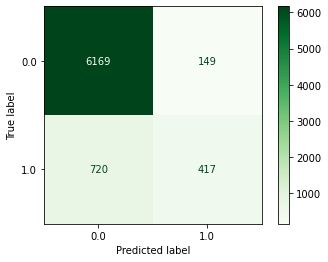

In [102]:
plot_confusion_matrix(ADB_model,x_train,y_train,cmap=plt.cm.Greens);

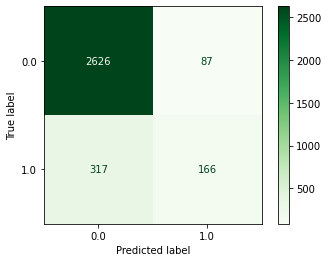

In [103]:
plot_confusion_matrix(ADB_model,x_test,y_test,cmap=plt.cm.Greens);

AUC: 0.872


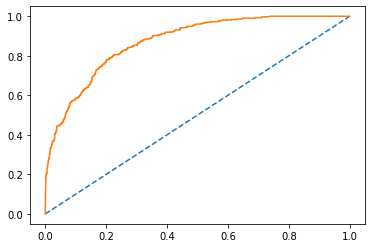

In [104]:
# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.872


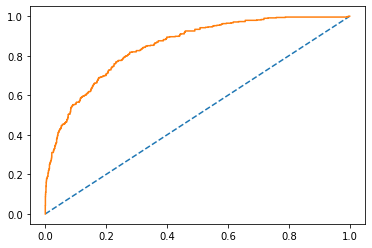

In [105]:
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**GRADIENT BOOST**

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(x_train, y_train)


In [107]:
y_train_predict = gbcl.predict(x_train)
model_score = gbcl.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9153588195841716
[[6285   33]
 [ 598  539]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      6318
         1.0       0.94      0.47      0.63      1137

    accuracy                           0.92      7455
   macro avg       0.93      0.73      0.79      7455
weighted avg       0.92      0.92      0.90      7455



In [108]:
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


0.9017521902377973
[[2683   30]
 [ 284  199]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2713
         1.0       0.87      0.41      0.56       483

    accuracy                           0.90      3196
   macro avg       0.89      0.70      0.75      3196
weighted avg       0.90      0.90      0.89      3196



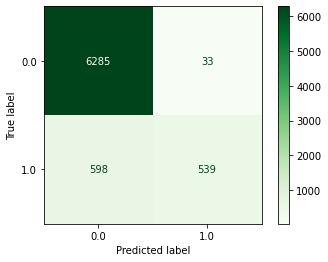

In [109]:
plot_confusion_matrix(gbcl,x_train,y_train,cmap=plt.cm.Greens);

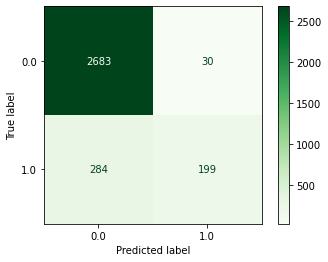

In [110]:
plot_confusion_matrix(gbcl,x_test,y_test,cmap=plt.cm.Greens);

AUC: 0.927


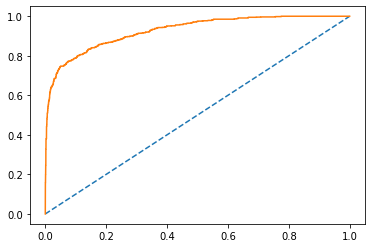

In [111]:
# predict probabilities
probs = gbcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.927


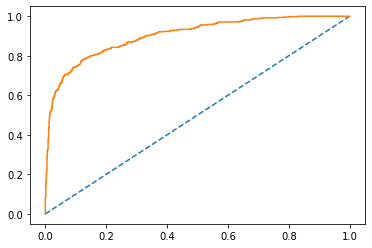

In [112]:
probs = gbcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**HYPER PARAMETER TUNING**

**SMOTE**

In [113]:
 !pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
from imblearn.over_sampling import SMOTE


In [115]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [116]:
x_train_res.shape


(12636, 31)

In [117]:
y_train_res.value_counts()

0.0    6318
1.0    6318
Name: Taken_product_Yes, dtype: int64

**REBUILDING TOP 3 MODELS WITH SMOTE**

**CROSSVALIDATING TOP 3 MODELS**

In [118]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
# scores


In [119]:
# scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
# scores


**After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. **
**Hence our model is valid.**
**Students are advised to perform CV on other models and compare the results**

In [120]:
df_laptop.shape

(1108, 32)

**WE WOULD TRY TO BUILD VARIOUS MODELS FOR MOBILE AS WELL AS LAPTOP USERS SEPARATELY**

**LAPTOP USERS**

In [121]:
df_laptop.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,1108.0,282.129964,64.239638,138.0,237.00,270.5,325.00,462.00
total_likes_on_outstation_checkin_given,1108.0,27769.664260,13361.837042,3818.0,17650.25,26942.5,39380.25,52512.00
yearly_avg_Outstation_checkins,1108.0,9.277978,8.409913,1.0,2.00,7.0,15.00,29.00
Yearly_avg_comment_on_travel_page,1108.0,77.496390,21.039323,33.0,60.00,77.0,95.00,125.00
total_likes_on_outofstation_checkin_received,1108.0,6130.688628,4105.825519,1098.0,2884.00,4759.5,7979.50,16572.25
week_since_last_outstation_checkin,1108.0,2.998195,2.493351,0.0,1.00,2.0,4.00,11.00
montly_avg_comment_on_company_page,1108.0,26.391697,6.167198,14.0,22.00,26.0,31.00,42.00
travelling_network_rating,1108.0,2.776173,1.078864,1.0,2.00,3.0,4.00,4.00
Daily_Avg_mins_spend_on_traveling_page,1108.0,13.537004,7.926576,0.0,8.00,11.5,18.00,33.00
Taken_product_Yes,1108.0,0.249097,0.432686,0.0,0.00,0.0,0.00,1.00


In [122]:
df_laptop.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Taken_product_Yes,...,preferred_location_type_Medical,preferred_location_type_Other,preferred_location_type_Social media,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,following_company_page_Yes,working_flag_Yes,Adult_flag_1,Adult_flag_2,Adult_flag_3
5880,379.0,9776.0,8.0,64.0,5142.0,1.0,33.0,4.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5882,255.0,48725.0,3.0,59.0,2913.0,1.0,19.0,3.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5884,250.0,35184.0,2.0,84.0,3074.0,0.0,23.0,3.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5887,295.0,7572.0,23.0,48.0,9532.0,0.0,33.0,2.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5905,250.0,39379.0,16.0,80.0,3926.0,1.0,33.0,2.0,10.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [123]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [124]:
x = df_laptop.drop('Taken_product_Yes',axis=1)
y=df_laptop['Taken_product_Yes']


In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)


In [126]:
x_train.shape

(775, 31)

In [127]:
x_test.shape

(333, 31)

In [128]:
y_train.value_counts(normalize=True)

0.0    0.740645
1.0    0.259355
Name: Taken_product_Yes, dtype: float64

In [129]:
y_test.value_counts(normalize=True)

0.0    0.774775
1.0    0.225225
Name: Taken_product_Yes, dtype: float64

In [130]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## MODELS

**Naive Bayes Model**

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [132]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [133]:
y_train_predict = NB_model.predict(x_train)
model_score = NB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7987096774193548
[[481  93]
 [ 63 138]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       574
         1.0       0.60      0.69      0.64       201

    accuracy                           0.80       775
   macro avg       0.74      0.76      0.75       775
weighted avg       0.81      0.80      0.80       775



In [134]:
y_test_predict = NB_model.predict(x_test)
model_score = NB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7807807807807807
[[215  43]
 [ 30  45]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85       258
         1.0       0.51      0.60      0.55        75

    accuracy                           0.78       333
   macro avg       0.69      0.72      0.70       333
weighted avg       0.80      0.78      0.79       333



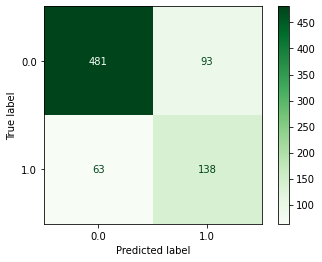

In [135]:
plot_confusion_matrix(NB_model,x_train,y_train,cmap=plt.cm.Greens);

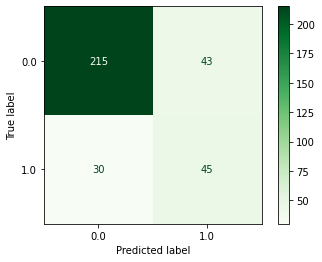

In [136]:
plot_confusion_matrix(NB_model,x_test,y_test,cmap=plt.cm.Greens);

AUC: 0.795


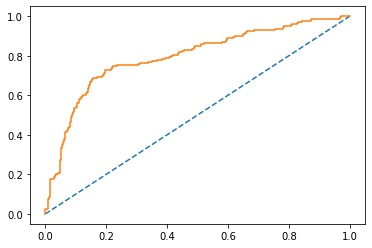

In [137]:
# predict probabilities
probs = NB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.795


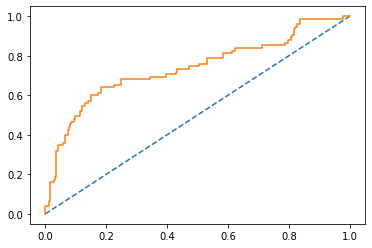

In [138]:
probs = NB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


### **LDA**

In [139]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(x_train, y_train)


LinearDiscriminantAnalysis()

In [140]:
y_train_predict = LDA_model.predict(x_train)
model_score = LDA_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8451612903225807
[[545  29]
 [ 91 110]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       574
         1.0       0.79      0.55      0.65       201

    accuracy                           0.85       775
   macro avg       0.82      0.75      0.77       775
weighted avg       0.84      0.85      0.84       775



In [141]:
y_test_predict = LDA_model.predict(x_test)
model_score = LDA_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8558558558558559
[[248  10]
 [ 38  37]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       258
         1.0       0.79      0.49      0.61        75

    accuracy                           0.86       333
   macro avg       0.83      0.73      0.76       333
weighted avg       0.85      0.86      0.84       333



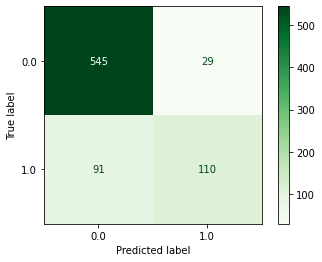

In [142]:
plot_confusion_matrix(LDA_model,x_train,y_train,cmap=plt.cm.Greens);

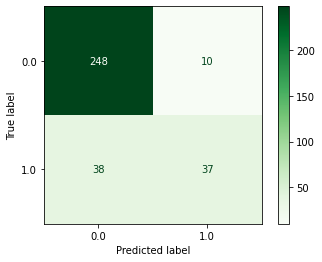

In [143]:
plot_confusion_matrix(LDA_model,x_test,y_test,cmap=plt.cm.Greens);

AUC: 0.860


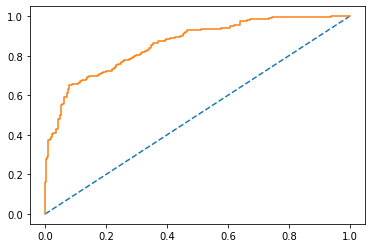

In [144]:
# predict probabilities
probs = LDA_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.860


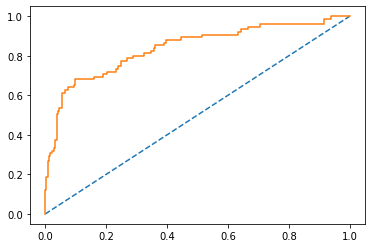

In [145]:
probs = LDA_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**LOGISTIC REGRESSION**

In [146]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [147]:
LR_model = LogisticRegression(max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LR_model.fit(x_train, y_train)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', verbose=True)

In [148]:
ytrain_predict = LR_model.predict(x_train)
ytest_predict = LR_model.predict(x_test)

In [149]:
y_train_predict = LR_model.predict(x_train)
model_score = LR_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8529032258064516
[[544  30]
 [ 84 117]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       574
         1.0       0.80      0.58      0.67       201

    accuracy                           0.85       775
   macro avg       0.83      0.76      0.79       775
weighted avg       0.85      0.85      0.84       775



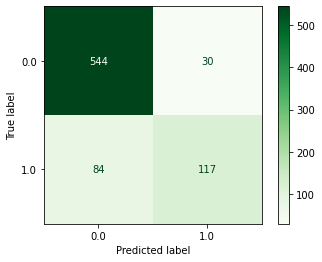

In [150]:
plot_confusion_matrix(LR_model,x_train,y_train,cmap=plt.cm.Greens);


AUC: 0.870


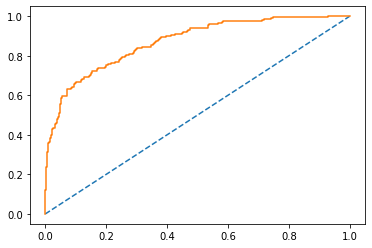

In [151]:
# predict probabilities
probs = LR_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


In [152]:
y_test_predict = LR_model.predict(x_test)
model_score = LR_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8378378378378378
[[242  16]
 [ 38  37]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       258
         1.0       0.70      0.49      0.58        75

    accuracy                           0.84       333
   macro avg       0.78      0.72      0.74       333
weighted avg       0.83      0.84      0.83       333



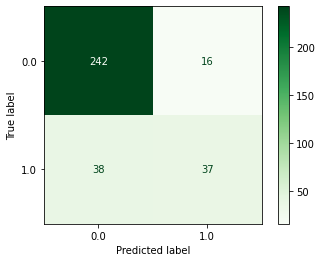

In [153]:
plot_confusion_matrix(LR_model,x_test,y_test,cmap=plt.cm.Greens);


AUC: 0.870


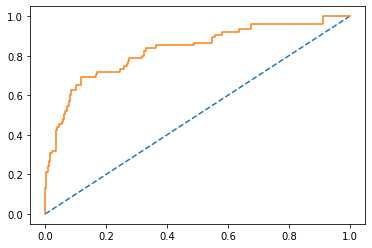

In [154]:
probs = LR_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


GRID SEARCH CV

In [155]:
grid={'penalty':['l1','l2','elasticnet','none'],
      'solver':['newton-cg','saga','sag','lbfgs'],
      'tol':[0.001,0.0001,0.00001]}

In [156]:
LR_model = LogisticRegression(max_iter=10000,n_jobs=2)


In [157]:
grid_search = GridSearchCV(estimator = LR_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [158]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [159]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)


{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   tol=0.001)


In [160]:
best_model = grid_search.best_estimator_


In [161]:
ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)


In [162]:
ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.869776,0.130224
1,0.631179,0.368821
2,0.989758,0.010242
3,0.755092,0.244908
4,0.160743,0.839257


0.8529032258064516
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       574
         1.0       0.80      0.58      0.67       201

    accuracy                           0.85       775
   macro avg       0.83      0.76      0.79       775
weighted avg       0.85      0.85      0.84       775
 



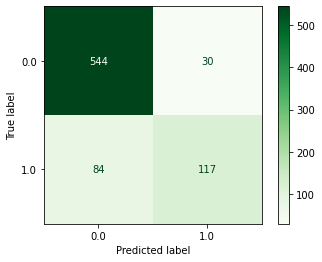

In [163]:
y_train_predict = best_model.predict(x_train)
model_score = best_model.score(x_train, y_train)
print(model_score)
plot_confusion_matrix(best_model,x_train,y_train,cmap=plt.cm.Greens)
print(classification_report(y_train, ytrain_predict),'\n');


0.8378378378378378
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       258
         1.0       0.70      0.49      0.58        75

    accuracy                           0.84       333
   macro avg       0.78      0.72      0.74       333
weighted avg       0.83      0.84      0.83       333
 



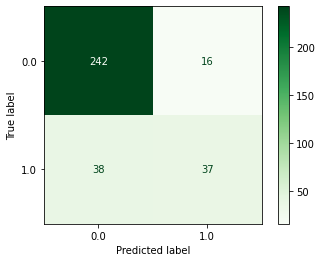

In [164]:
y_test_predict = best_model.predict(x_test)
model_score = best_model.score(x_test, y_test)
print(model_score)
plot_confusion_matrix(best_model,x_test,y_test,cmap=plt.cm.Greens)
print(classification_report(y_test, ytest_predict),'\n');


AUC: 0.870


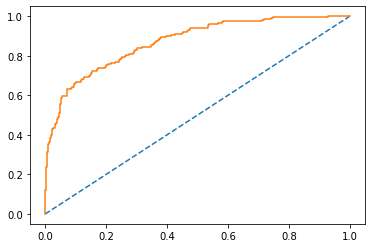

In [165]:
# predict probabilities
probs = best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.870


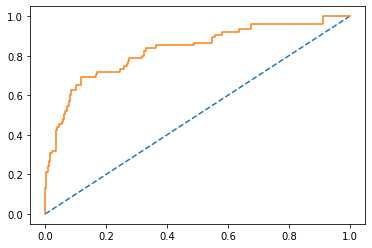

In [166]:
probs = best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**KNN**

In [167]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)


KNeighborsClassifier()

In [168]:
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9638709677419355
[[569   5]
 [ 23 178]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       574
         1.0       0.97      0.89      0.93       201

    accuracy                           0.96       775
   macro avg       0.97      0.94      0.95       775
weighted avg       0.96      0.96      0.96       775



In [169]:
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9009009009009009
[[250   8]
 [ 25  50]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       258
         1.0       0.86      0.67      0.75        75

    accuracy                           0.90       333
   macro avg       0.89      0.82      0.84       333
weighted avg       0.90      0.90      0.90       333



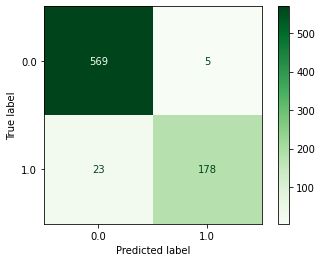

In [170]:
plot_confusion_matrix(KNN_model,x_train,y_train,cmap=plt.cm.Greens)

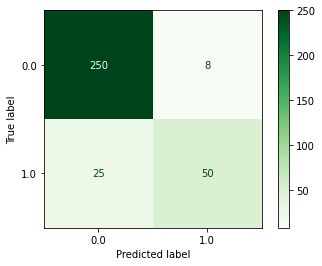

In [171]:
plot_confusion_matrix(KNN_model,x_test,y_test,cmap=plt.cm.Greens)

AUC: 0.990


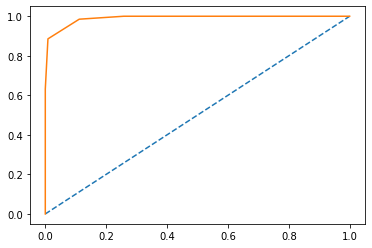

In [172]:
# predict probabilities
probs = KNN_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.990


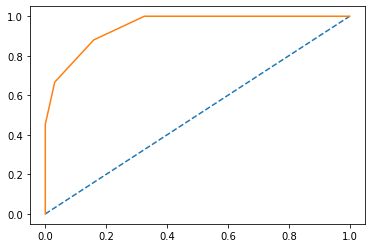

In [173]:
probs = KNN_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


In [174]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.006006006006005982,
 0.04504504504504503,
 0.09909909909909909,
 0.13213213213213215,
 0.13813813813813813,
 0.14714714714714716,
 0.14414414414414412,
 0.1501501501501501,
 0.15915915915915912,
 0.17417417417417413]

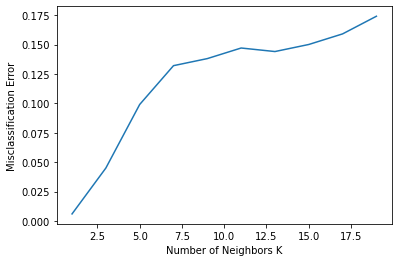

In [175]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [176]:
KNN_best_model=KNeighborsClassifier(n_neighbors=1)
KNN_best_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [177]:
## Performance Matrix on train data set
y_train_predict = KNN_best_model.predict(x_train)
model_score = KNN_best_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[574   0]
 [  0 201]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       574
         1.0       1.00      1.00      1.00       201

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [178]:
## Performance Matrix on test data set
y_test_predict = KNN_best_model.predict(x_test)
model_score = KNN_best_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.993993993993994
[[257   1]
 [  1  74]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       258
         1.0       0.99      0.99      0.99        75

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



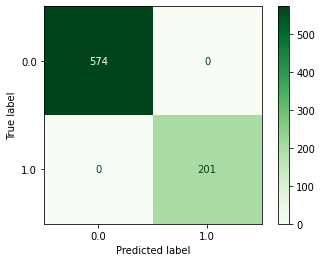

In [179]:
plot_confusion_matrix(KNN_best_model,x_train,y_train,cmap=plt.cm.Greens);

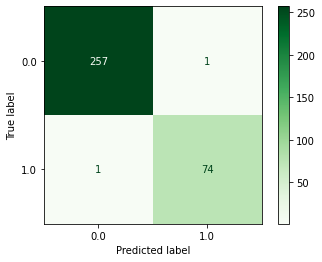

In [180]:
plot_confusion_matrix(KNN_best_model,x_test,y_test,cmap=plt.cm.Greens);

AUC: 1.000


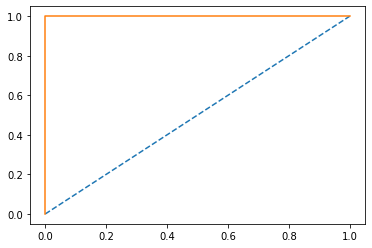

In [181]:
# predict probabilities
probs = KNN_best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


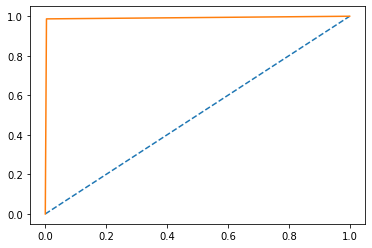

In [182]:
probs = KNN_best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**DECISION TREE**

In [183]:
from sklearn import tree

DT_model= tree.DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [184]:
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


1.0
[[574   0]
 [  0 201]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       574
         1.0       1.00      1.00      1.00       201

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [185]:
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


0.9369369369369369
[[248  10]
 [ 11  64]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       258
         1.0       0.86      0.85      0.86        75

    accuracy                           0.94       333
   macro avg       0.91      0.91      0.91       333
weighted avg       0.94      0.94      0.94       333



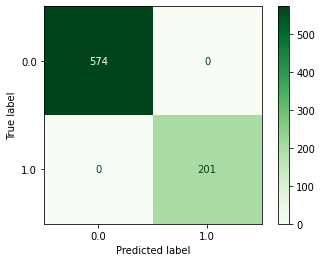

In [186]:
plot_confusion_matrix(DT_model,x_train,y_train,cmap=plt.cm.Greens)

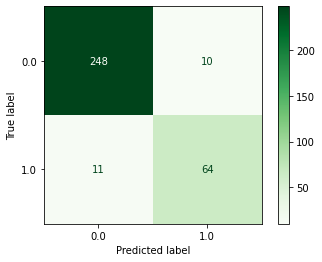

In [187]:
plot_confusion_matrix(DT_model,x_test,y_test,cmap=plt.cm.Greens)

AUC: 1.000


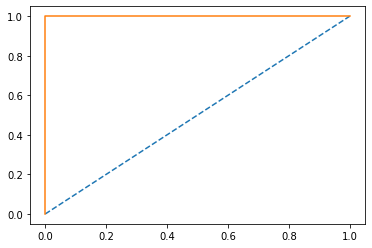

In [188]:
# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 1.000


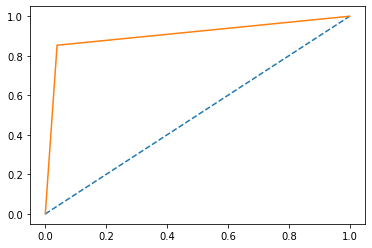

In [189]:
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**HYPER PARAMETER TUNING**

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
para_grid = {'criterion':['gini','entropy'],
        'max_depth': range(1,10),
       'min_samples_split' :range(1,10),
       'min_samples_leaf' : range(1,5)}

In [192]:
grid=GridSearchCV(DT_model,param_grid=para_grid,cv=5,verbose=1,n_jobs=-1)

In [193]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [194]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [195]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [196]:
DT_best_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=4)
DT_best_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=4)

In [197]:
y_train_predict = DT_best_model.predict(x_train)
model_score = DT_best_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.9883870967741936
[[570   4]
 [  5 196]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       574
         1.0       0.98      0.98      0.98       201

    accuracy                           0.99       775
   macro avg       0.99      0.98      0.98       775
weighted avg       0.99      0.99      0.99       775



In [198]:
y_test_predict = DT_best_model.predict(x_test)
model_score = DT_best_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.963963963963964
[[253   5]
 [  7  68]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       258
         1.0       0.93      0.91      0.92        75

    accuracy                           0.96       333
   macro avg       0.95      0.94      0.95       333
weighted avg       0.96      0.96      0.96       333



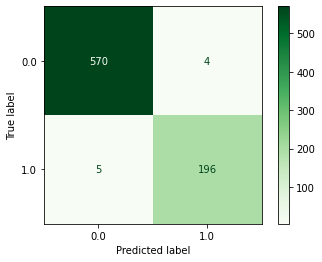

In [199]:
plot_confusion_matrix(DT_best_model,x_train,y_train,cmap=plt.cm.Greens)

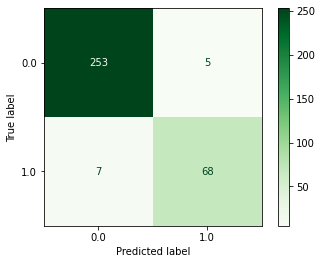

In [200]:
plot_confusion_matrix(DT_best_model,x_test,y_test,cmap=plt.cm.Greens)

AUC: 0.999


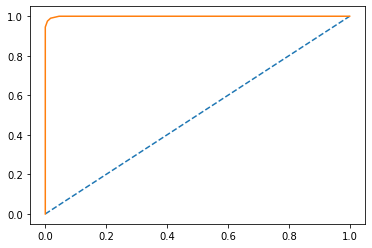

In [201]:
# predict probabilities
probs = DT_best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.999


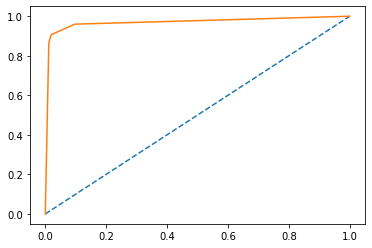

In [202]:
probs = DT_best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**RANDOM FOREST**

In [203]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(x_train, y_train)


RandomForestClassifier(random_state=1)

In [204]:
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


1.0
[[574   0]
 [  0 201]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       574
         1.0       1.00      1.00      1.00       201

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [205]:
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


0.963963963963964
[[256   2]
 [ 10  65]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       258
         1.0       0.97      0.87      0.92        75

    accuracy                           0.96       333
   macro avg       0.97      0.93      0.95       333
weighted avg       0.96      0.96      0.96       333



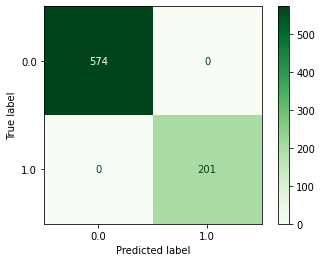

In [206]:
plot_confusion_matrix(RF_model,x_train,y_train,cmap=plt.cm.Greens)

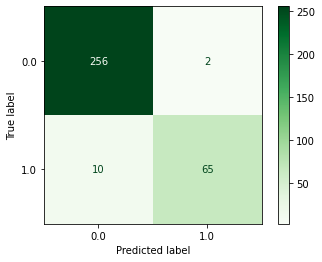

In [207]:
plot_confusion_matrix(RF_model,x_test,y_test,cmap=plt.cm.Greens)

AUC: 1.000


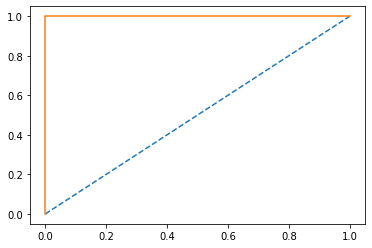

In [208]:
# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 1.000


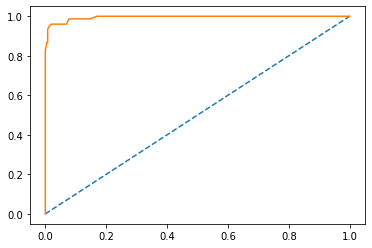

In [209]:
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**TUNING RANDOM FOREST**

In [210]:
para_grid = {
    'bootstrap': [True],
    'max_depth': [45,50],
    'max_features': [6,7],
    'min_samples_leaf': [1,2],
    'min_samples_split': [4,5],
    'n_estimators': [60,70]
}

In [211]:
grid=GridSearchCV(RF_model,param_grid=para_grid,cv=3,verbose=1,n_jobs=-1)

In [212]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [45, 50],
                         'max_features': [6, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 5],
                         'n_estimators': [60, 70]},
             verbose=1)

In [213]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 45,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 70}

In [214]:
grid.best_estimator_

RandomForestClassifier(max_depth=45, max_features=7, min_samples_split=5,
                       n_estimators=70, random_state=1)

In [220]:
RF_best_model = RandomForestClassifier(max_depth = 45, max_features = 9,min_samples_leaf = 1,min_samples_split = 5,n_estimators = 70, criterion='entropy', random_state = 1)
RF_best_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=45, max_features=9,
                       min_samples_split=5, n_estimators=70, random_state=1)

In [221]:
y_train_predict = RF_best_model.predict(x_train)
model_score = RF_best_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.9987096774193548
[[574   0]
 [  1 200]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       574
         1.0       1.00      1.00      1.00       201

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [222]:
y_test_predict = RF_best_model.predict(x_test)
model_score = RF_best_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.972972972972973
[[258   0]
 [  9  66]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       258
         1.0       1.00      0.88      0.94        75

    accuracy                           0.97       333
   macro avg       0.98      0.94      0.96       333
weighted avg       0.97      0.97      0.97       333



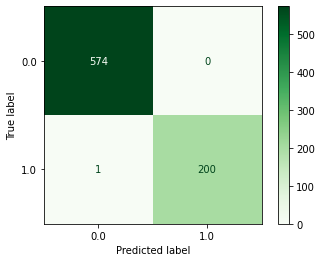

In [280]:
plot_confusion_matrix(RF_best_model,x_train,y_train,cmap=plt.cm.Greens)

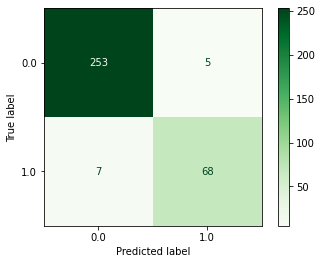

In [ ]:
plot_confusion_matrix(RF_best_model,x_test,y_test,cmap=plt.cm.Greens)

AUC: 1.000


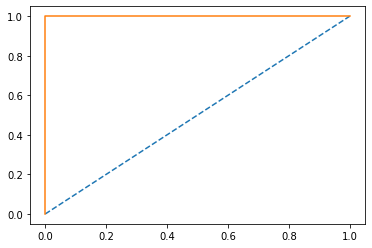

In [281]:
# predict probabilities
probs = RF_best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.999


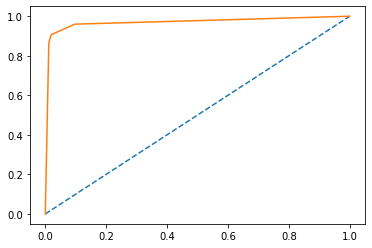

In [ ]:
probs = RF_best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**BAGGING**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(x_train, y_train)


In [ ]:
y_train_predict = Bagging_model.predict(x_train)
model_score =Bagging_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


In [ ]:
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


In [ ]:
plot_confusion_matrix(Bagging_model,x_train,y_train,cmap=plt.cm.Greens)

In [ ]:
plot_confusion_matrix(Bagging_model,x_test,y_test,cmap=plt.cm.Greens)

In [ ]:
# predict probabilities
probs = Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


In [ ]:
probs = Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)


In [ ]:
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


In [ ]:
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


In [ ]:
plot_confusion_matrix(ADB_model,x_train,y_train,cmap=plt.cm.Greens)

In [ ]:
plot_confusion_matrix(ADB_model,x_test,y_test,cmap=plt.cm.Greens)

In [ ]:
# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


In [ ]:
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


**GRADIENT BOOST**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(x_train, y_train)


In [ ]:
y_train_predict = gbcl.predict(x_train)
model_score = gbcl.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


In [ ]:
plot_confusion_matrix(gbcl,x_train,y_train,cmap=plt.cm.Greens)

In [ ]:
plot_confusion_matrix(gbcl,x_test,y_test,cmap=plt.cm.Greens)

In [ ]:
# predict probabilities
probs = gbcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


In [ ]:
probs = gbcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
